# Road Rage

In [1]:
from road_rage import main
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animate
import seaborn
%matplotlib inline

In [2]:
speeds, positions, mean, stdev, speed_limit = main()

## Early Traffic Density

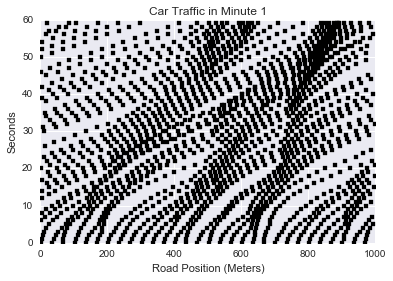

In [3]:
fig, ax = plt.subplots()
for x in positions:
    ax.scatter(x[:60], range(60), marker=',', color='k')
ax.set_xlim(0, 1000)
ax.set_ylim(0, 60)
ax.set_xlabel('Road Position (Meters)')
ax.set_ylabel('Seconds')
ax.set_title('Car Traffic in Minute 1')


### Notes
Traffic seems more than happy to get jammed early on.

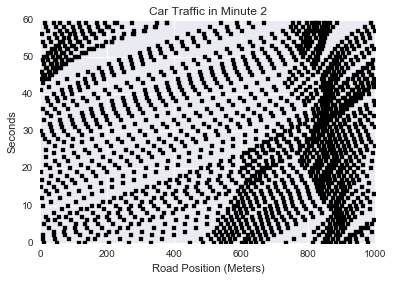

In [4]:
fig, ax = plt.subplots()
for x in positions:
    ax.scatter(x[60:120], range(60), marker=',', color='k')
ax.set_xlim(0, 1000)
ax.set_ylim(0, 60)
ax.set_xlabel('Road Position (Meters)')
ax.set_ylabel('Seconds')
ax.set_title('Car Traffic in Minute 2')

### Notes
Still getting all jammed up.

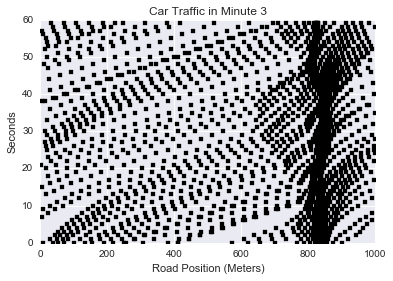

In [5]:
fig, ax = plt.subplots()
for x in positions:
    ax.scatter(x[120:180], range(60), marker=',', color='k')
ax.set_xlim(0, 1000)
ax.set_ylim(0, 60)
ax.set_xlabel('Road Position (Meters)')
ax.set_ylabel('Seconds')
ax.set_title('Car Traffic in Minute 3')

### Notes
The third minute does not show a lot of improvement on the jam front.  The cars did have a nice, 400 meter stretch though.

## Stable Traffic Density

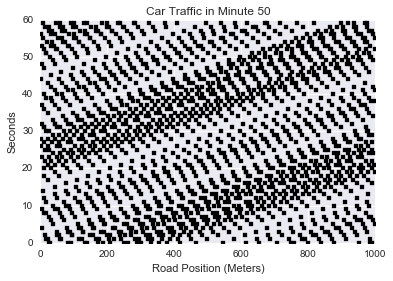

In [6]:
fig, ax = plt.subplots()
for x in positions:
    ax.scatter(x[3000:3060], range(60), marker=',', color='k')
ax.set_xlim(0, 1000)
ax.set_ylim(0, 60)
ax.set_xlabel('Road Position (Meters)')
ax.set_ylabel('Seconds')
ax.set_title('Car Traffic in Minute 50')

### Notes
Finally, the cars start to get their ideal grouping and maintain a more consistent speed.  This pattern sticks around for most of the time sampling... with some changes due to random slowing.

## Traffic Speeds

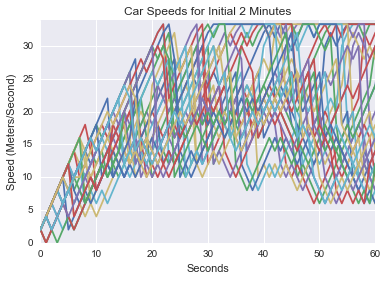

In [7]:
fig, ax = plt.subplots()
for x in speeds:
    ax.plot(range(120), x[:120])
ax.set_xlim(0, 60)
ax.set_ylim(0, 34)
ax.set_xlabel('Seconds')
ax.set_ylabel('Speed (Meters/Second)')
ax.set_title('Car Speeds for Initial 2 Minutes')

### Notes
Speeds in the first two minutes vary wildly, but show a general pattern of acceleration.

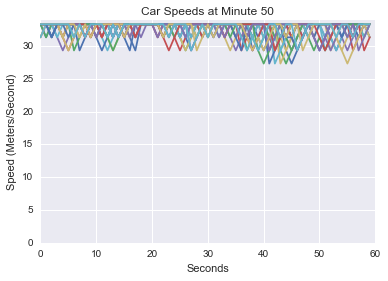

In [8]:
fig, ax = plt.subplots()
for x in speeds:
    ax.plot(range(60), x[3000:3060])
ax.set_xlim(0, 60)
ax.set_ylim(0, 34)
ax.set_xlabel('Seconds')
ax.set_ylabel('Speed (Meters/Second)')
ax.set_title('Car Speeds at Minute 50')

### Notes
At minute 50, the cars maintain a more steady speed with less variance.  

## Frequency of Speeds with Mean and +Standard Deviation

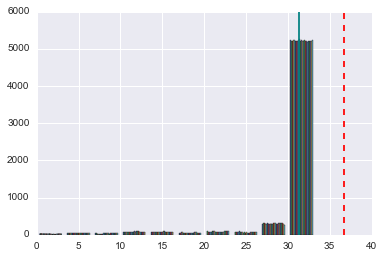

In [9]:
plt.hist(speeds)
ymin, ymax = plt.ylim()
plt.vlines(mean, ymin, ymax, color='teal')
plt.vlines((mean + stdev), ymin, ymax, color='red', linestyles='dashed')
plt.show()

### Notes
Cars seemed to find an average speed of just below 30m/s.  We operated under the assumption that 1 standard deviation above the mean is an appropriate speed limit, thus...

## Speed Limit: 133 km/h (37 m/s)

The speed limit seems appropriate for maintaining smooth traffic flow, with the note that it is above the max speed of all of our cars.  Adding cars with different driving patterns/attributes and changing road scenarios would make for an interesting excercise.

# Alternative Speed Limit: First 60 Seconds
Per the instructions, it seems like we really should only be taking the first 60 seconds into account for speed limit.  As such, here are some numbers that would reflect that change.
## First Minute Positions
For convenience, here is the first minute position chart again.  

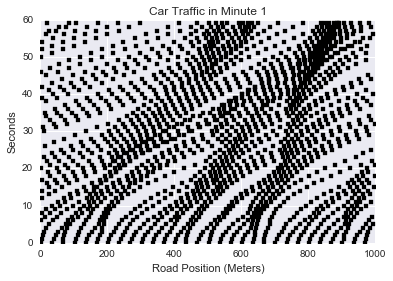

In [10]:
fig, ax = plt.subplots()
for x in positions:
    ax.scatter(x[:60], range(60), marker=',', color='k')
ax.set_xlim(0, 1000)
ax.set_ylim(0, 60)
ax.set_xlabel('Road Position (Meters)')
ax.set_ylabel('Seconds')
ax.set_title('Car Traffic in Minute 1')

In [13]:
first_sixty_seconds = []
for item in speeds:
    first_sixty_seconds.append(item[:60])

In [21]:
f60mean = np.mean(first_sixty_seconds)
f60stdv = np.std(first_sixty_seconds)
f60speed_limit = int(round(f60mean + f60stdv))

In [22]:
print(f60speed_limit)

26


## First 60 Second based Speed Limit: 93.6 km/h (26m/s)
This might be a more useful speed limit, if the road weren't a magical, infinite loop in which cars were spawned automatically and never seem to run out of gas.  